# Lib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd
import datetime
import matplotlib.dates as mdates


#!pip install colorspacious
#!pip install mapclassify
from matplotlib.animation import FuncAnimation
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()

# variables

In [2]:
plt.style.use("Solarize_Light2")

# import data and geodata

In [3]:
df = pd.read_csv("datos/vacunacion_municipios_bo.csv", index_col=0)
df.fecha = pd.to_datetime(df.fecha)
df[df.municipio.str.contains("Sant")]

,fecha,cod_ine,municipio,departamento,dosis,porcentaje
110,2021-10-23,20308,Santiago De Callapa,La Paz,1,19
111,2021-10-23,20308,Santiago De Callapa,La Paz,2,16
112,2021-10-30,20308,Santiago De Callapa,La Paz,1,20
113,2021-10-30,20308,Santiago De Callapa,La Paz,2,17
114,2021-11-13,20308,Santiago De Callapa,La Paz,1,22
...,...,...,...,...,...,...
3254,2021-11-13,70101,Santa Cruz de la Sierra,Santa Cruz,2,66
3255,2021-11-20,70101,Santa Cruz de la Sierra,Santa Cruz,1,80
3256,2021-11-20,70101,Santa Cruz de la Sierra,Santa Cruz,2,66
3257,2021-11-27,70101,Santa Cruz de la Sierra,Santa Cruz,1,80


In [4]:
sdsn = pd.read_csv("other/sdsn/sdsn.csv")

sdsn

,Código,Municipio,Departamento,Índice Municipal de Desarrollo Sostenible,Ranking del Índice de Bolivia,Población 2020,"Tasa de urbanización, 2012 (% de población)","Tasa de pobreza energética extrema, 2016 (% de viviendas)","Número de viviendas que consumen menos del 25% del límite de Tarifa Dignidad (210 kWh/año), 2016","Necesidades Básicas Insatisfechas, 2012 (% de población)",...,"Tasa de homicidios registrados, promedio 2015-2017 (por 100,000 habitantes)","Número de homicidios registrados, 2015-2017","Capacidad de ejecución del presupuesto programado, 2017 (%)","Presupuesto Operativo Annual (POA) en Bs., 2017","Niños inscritos en el registro civil (< 5 años), 2012 (%)","Número de niños menores de 5 años que no están registrados en un registro civil, 2012","Proporción de ingresos municipales que provienen de impuestos locales, 2017 (%)",Unnamed: 128,"Inversión pública per cápita, 2017 (Bs./persona)","Inversión pública total, 2017 (Bs.)"
0,10101,Sucre,Chuquisaca,69.6,5,295476,91.4,23.8,17473,26.9,...,2.4,20,86.2,737627253,94.2,1865,15.9,NaN,671,191011393
1,10102,Yotala,Chuquisaca,55.5,75,10017,0.0,45.8,1229,54.4,...,0.0,0,65.5,21577261,95.7,47,3.4,NaN,478,4746053
2,10103,Poroma,Chuquisaca,35.7,339,18947,0.0,96.1,4839,95.9,...,1.8,1,78.8,31727744,85.2,407,0.0,NaN,475,8806159
3,10201,Azurduy,Chuquisaca,37.9,333,10948,0.0,86.8,2199,87.7,...,0.0,0,75.7,32003762,88.0,194,0.1,NaN,998,10934748
4,10202,Tarvita,Chuquisaca,40.0,327,14688,0.0,86.1,2935,86.9,...,0.0,0,83.1,32967137,85.7,291,0.2,NaN,625,9179263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,90401,Santa Rosa,Pando,48.2,217,2506,0.0,.,.,73.3,...,0.0,0,79.6,11766583,84.0,63,0.0,NaN,1057,2648417
335,90402,Ingavi,Pando,43.6,295,1840,0.0,.,.,86.7,...,0.0,0,81.8,11270615,75.1,82,0.0,NaN,2482,4451916
336,90501,Nueva Esperanza,Pando,46.0,273,2422,0.0,.,.,87.9,...,0.0,0,65.1,13017445,85.7,43,0.0,NaN,1291,3024250
337,90502,Villa Nueva-Loma Alta,Pando,43.0,305,3209,0.0,.,.,86.6,...,0.0,0,76.9,14426911,85.2,77,0.0,NaN,1308,4088985


In [5]:
casos = pd.read_csv("https://github.com/dquintani/covid/blob/main/casos_municipios_completo.csv?raw=true", index_col=0)
casos

,fecha,cod_ine,municipio_x,confirmados,municipio_y,departamento,sdi,poblacion,urbanizacion
0,2020-03-19,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
1,2020-03-24,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
2,2020-03-25,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
3,2020-03-26,20101,Nuestra Señora de La Paz,2,La Paz,La Paz,80.151007,816044,99.0
4,2020-03-28,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
...,...,...,...,...,...,...,...,...,...
35590,2021-04-23,90402,Ingavi,3,Ingavi,Pando,43.623216,1840,0.0
35591,2021-04-26,90402,Ingavi,1,Ingavi,Pando,43.623216,1840,0.0
35592,2021-05-24,90402,Ingavi,2,Ingavi,Pando,43.623216,1840,0.0
35593,2021-06-07,90402,Ingavi,2,Ingavi,Pando,43.623216,1840,0.0


### geo maps

In [6]:
df_map = gpd.read_file("other/geo/municipios.339.geojson")
df_map['CODIGO'] = df_map['CODIGO'].str[1:]
df_map = df_map.rename(columns={"CODIGO": "cod_ine"})
df_map["cod_ine"] = df_map["cod_ine"].astype(float)

display(df_map)
df_map.plot

,MUNICIPIO,name,cod_ine,rmapshaperid,geometry
0,Esmeralda,Esmeralda,40505.0,0,"POLYGON ((-68.26700 -18.81620, -68.23940 -18.8..."
1,Quillacas,Quillacas,40202.0,1,"POLYGON ((-66.50210 -19.35990, -66.54580 -19.3..."
2,Pampa Aullagas,Pampa Aullagas,40802.0,2,"POLYGON ((-67.05310 -19.09030, -67.05150 -19.1..."
3,Llallagua,Llallagua,50203.0,3,"POLYGON ((-66.41650 -18.25900, -66.41590 -18.2..."
4,Caripuyo,Caripuyo,50702.0,4,"POLYGON ((-66.52390 -18.08950, -66.51240 -18.0..."
...,...,...,...,...,...
339,Pasorapa,Pasorapa,30202.0,339,"POLYGON ((-64.69980 -18.08970, -64.69190 -18.0..."
340,Cotagaita,Cotagaita,50601.0,340,"POLYGON ((-65.55440 -20.29200, -65.55710 -20.3..."
341,Camargo,Camargo,10701.0,341,"POLYGON ((-64.86470 -20.49130, -64.86870 -20.5..."
342,Villazón,Villazón,51501.0,342,"POLYGON ((-65.39070 -21.84670, -65.38950 -21.8..."


# data manipulation

## add poblacion

In [7]:
#only population
sdsn = sdsn.loc[:,["Código", "Población 2020"]]

#merge
df = df.merge(sdsn, left_on="cod_ine", right_on="Código")

#consolidate
df = df.drop("Código", axis=1) 
df = df.rename({"Población 2020": "poblacion2020"}, axis=1)
df_pop = df.pop("poblacion2020")
df.insert(4,"poblacion2020", df_pop)

df

,fecha,cod_ine,municipio,departamento,poblacion2020,dosis,porcentaje
0,2021-10-23,20503,Aucapata,La Paz,5771,1,10
1,2021-10-23,20503,Aucapata,La Paz,5771,2,9
2,2021-10-30,20503,Aucapata,La Paz,5771,1,10
3,2021-10-30,20503,Aucapata,La Paz,5771,2,9
4,2021-11-13,20503,Aucapata,La Paz,5771,1,13
...,...,...,...,...,...,...,...
3374,2021-11-13,70706,Camiri,Santa Cruz,36485,2,92
3375,2021-11-20,70706,Camiri,Santa Cruz,36485,1,97
3376,2021-11-20,70706,Camiri,Santa Cruz,36485,2,92
3377,2021-11-27,70706,Camiri,Santa Cruz,36485,1,98


## create dataframe formats

### long (default)

In [8]:
df

,fecha,cod_ine,municipio,departamento,poblacion2020,dosis,porcentaje
0,2021-10-23,20503,Aucapata,La Paz,5771,1,10
1,2021-10-23,20503,Aucapata,La Paz,5771,2,9
2,2021-10-30,20503,Aucapata,La Paz,5771,1,10
3,2021-10-30,20503,Aucapata,La Paz,5771,2,9
4,2021-11-13,20503,Aucapata,La Paz,5771,1,13
...,...,...,...,...,...,...,...
3374,2021-11-13,70706,Camiri,Santa Cruz,36485,2,92
3375,2021-11-20,70706,Camiri,Santa Cruz,36485,1,97
3376,2021-11-20,70706,Camiri,Santa Cruz,36485,2,92
3377,2021-11-27,70706,Camiri,Santa Cruz,36485,1,98


### wide

In [9]:
df_wide = df.pivot_table(index=['fecha', "cod_ine", "municipio","departamento","poblacion2020"], columns='dosis', values='porcentaje',
               # aggfunc='sum', fill_value=''
              ).reset_index()
df_wide

dosis,fecha,cod_ine,municipio,departamento,poblacion2020,1,2
0,2021-10-23,10101,Sucre,Chuquisaca,295476,85.0,70.0
1,2021-10-23,10102,Yotala,Chuquisaca,10017,49.0,46.0
2,2021-10-23,10103,Poroma,Chuquisaca,18947,20.0,13.0
3,2021-10-23,10201,Azurduy,Chuquisaca,10948,37.0,30.0
4,2021-10-23,10202,Tarvita,Chuquisaca,14688,20.0,17.0
...,...,...,...,...,...,...,...
1687,2021-11-27,90401,Nacebe (Santa Rosa Del Abuna),Pando,2506,65.0,51.0
1688,2021-11-27,90402,Ingavi (Humaita),Pando,1840,34.0,16.0
1689,2021-11-27,90501,Nuevo Manoa (Nueva Esperanza),Pando,2422,41.0,28.0
1690,2021-11-27,90502,Villa Nueva (Loma Alta),Pando,3209,54.0,38.0


### single df for each dose

In [10]:
df_primeras = df[df.dosis==1]
# display(df_primeras)
df_segundas = df[df.dosis==2]
# display(df_segundas)

# PARAMETERS

In [11]:
latest_date = df.sort_values("fecha")
latest_date = latest_date.fecha.iloc[-1].date()
print(str(latest_date))

2021-11-27


In [12]:
list_dates = df.sort_values("fecha").fecha.unique()
list(list_dates)

[numpy.datetime64('2021-10-23T00:00:00.000000000'),
 numpy.datetime64('2021-10-30T00:00:00.000000000'),
 numpy.datetime64('2021-11-13T00:00:00.000000000'),
 numpy.datetime64('2021-11-20T00:00:00.000000000'),
 numpy.datetime64('2021-11-27T00:00:00.000000000')]

In [13]:
list_mun = df.sort_values("poblacion2020", ascending=False).municipio.unique()
list_dept = df.sort_values("poblacion2020", ascending=False).departamento.unique()

In [14]:
mun_dict = dict(zip(df.cod_ine,df.municipio))

# EXPLORACIÓN

In [15]:
for i in mun_dict.keys():
    if len(df[df.cod_ine==i]) != 10:
        dfx = df[df.cod_ine==i]
        print(i,mun_dict[i], "--", len(dfx))
    

41601 Huayllamarca -- 9
40701 Huanuni -- 9
40702 Machacamarca -- 9
40401 Curahuara De Carangas -- 9
40101 Oruro -- 9
50902 S.P.De Quemes -- 4


In [16]:
df[df.municipio=="S.P.De Quemes"]

,fecha,cod_ine,municipio,departamento,poblacion2020,dosis,porcentaje
1435,2021-10-23,50902,S.P.De Quemes,Potosí,1289,1,36
1436,2021-10-23,50902,S.P.De Quemes,Potosí,1289,2,26
1437,2021-10-30,50902,S.P.De Quemes,Potosí,1289,1,36
1438,2021-10-30,50902,S.P.De Quemes,Potosí,1289,2,26


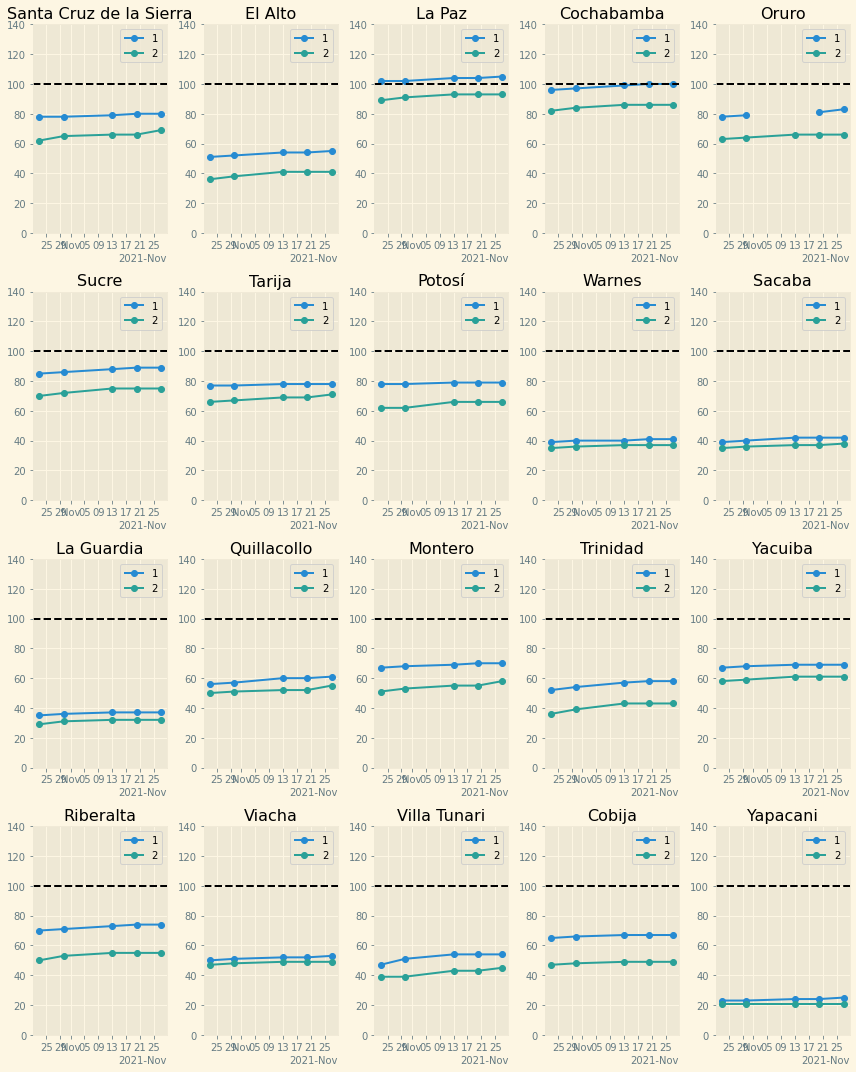

In [17]:
fig, axs = plt.subplots(4,5, figsize=(12,15))
axs = axs.flatten()

mun = list_mun[:20]
for i in range(len(mun)):
    df_mun = df_wide[df_wide.municipio==mun[i]]
    
    axs[i].set_title(mun[i])
    
    axs[i].plot(pd.to_datetime(df_mun.fecha), df_mun[1], label="1", marker="o")
    axs[i].plot(pd.to_datetime(df_mun.fecha), df_mun[2], label="2", marker="o")
    
    axs[i].set_ylim(0,140)
    # axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    axs[i].xaxis.set_major_formatter(mdates.ConciseDateFormatter(axs[i].xaxis.get_major_locator()))
    axs[i].axhline(100, color="black", linestyle="--")
    axs[i].legend()
    
fig.tight_layout()

# GRAFICAS

### original graph

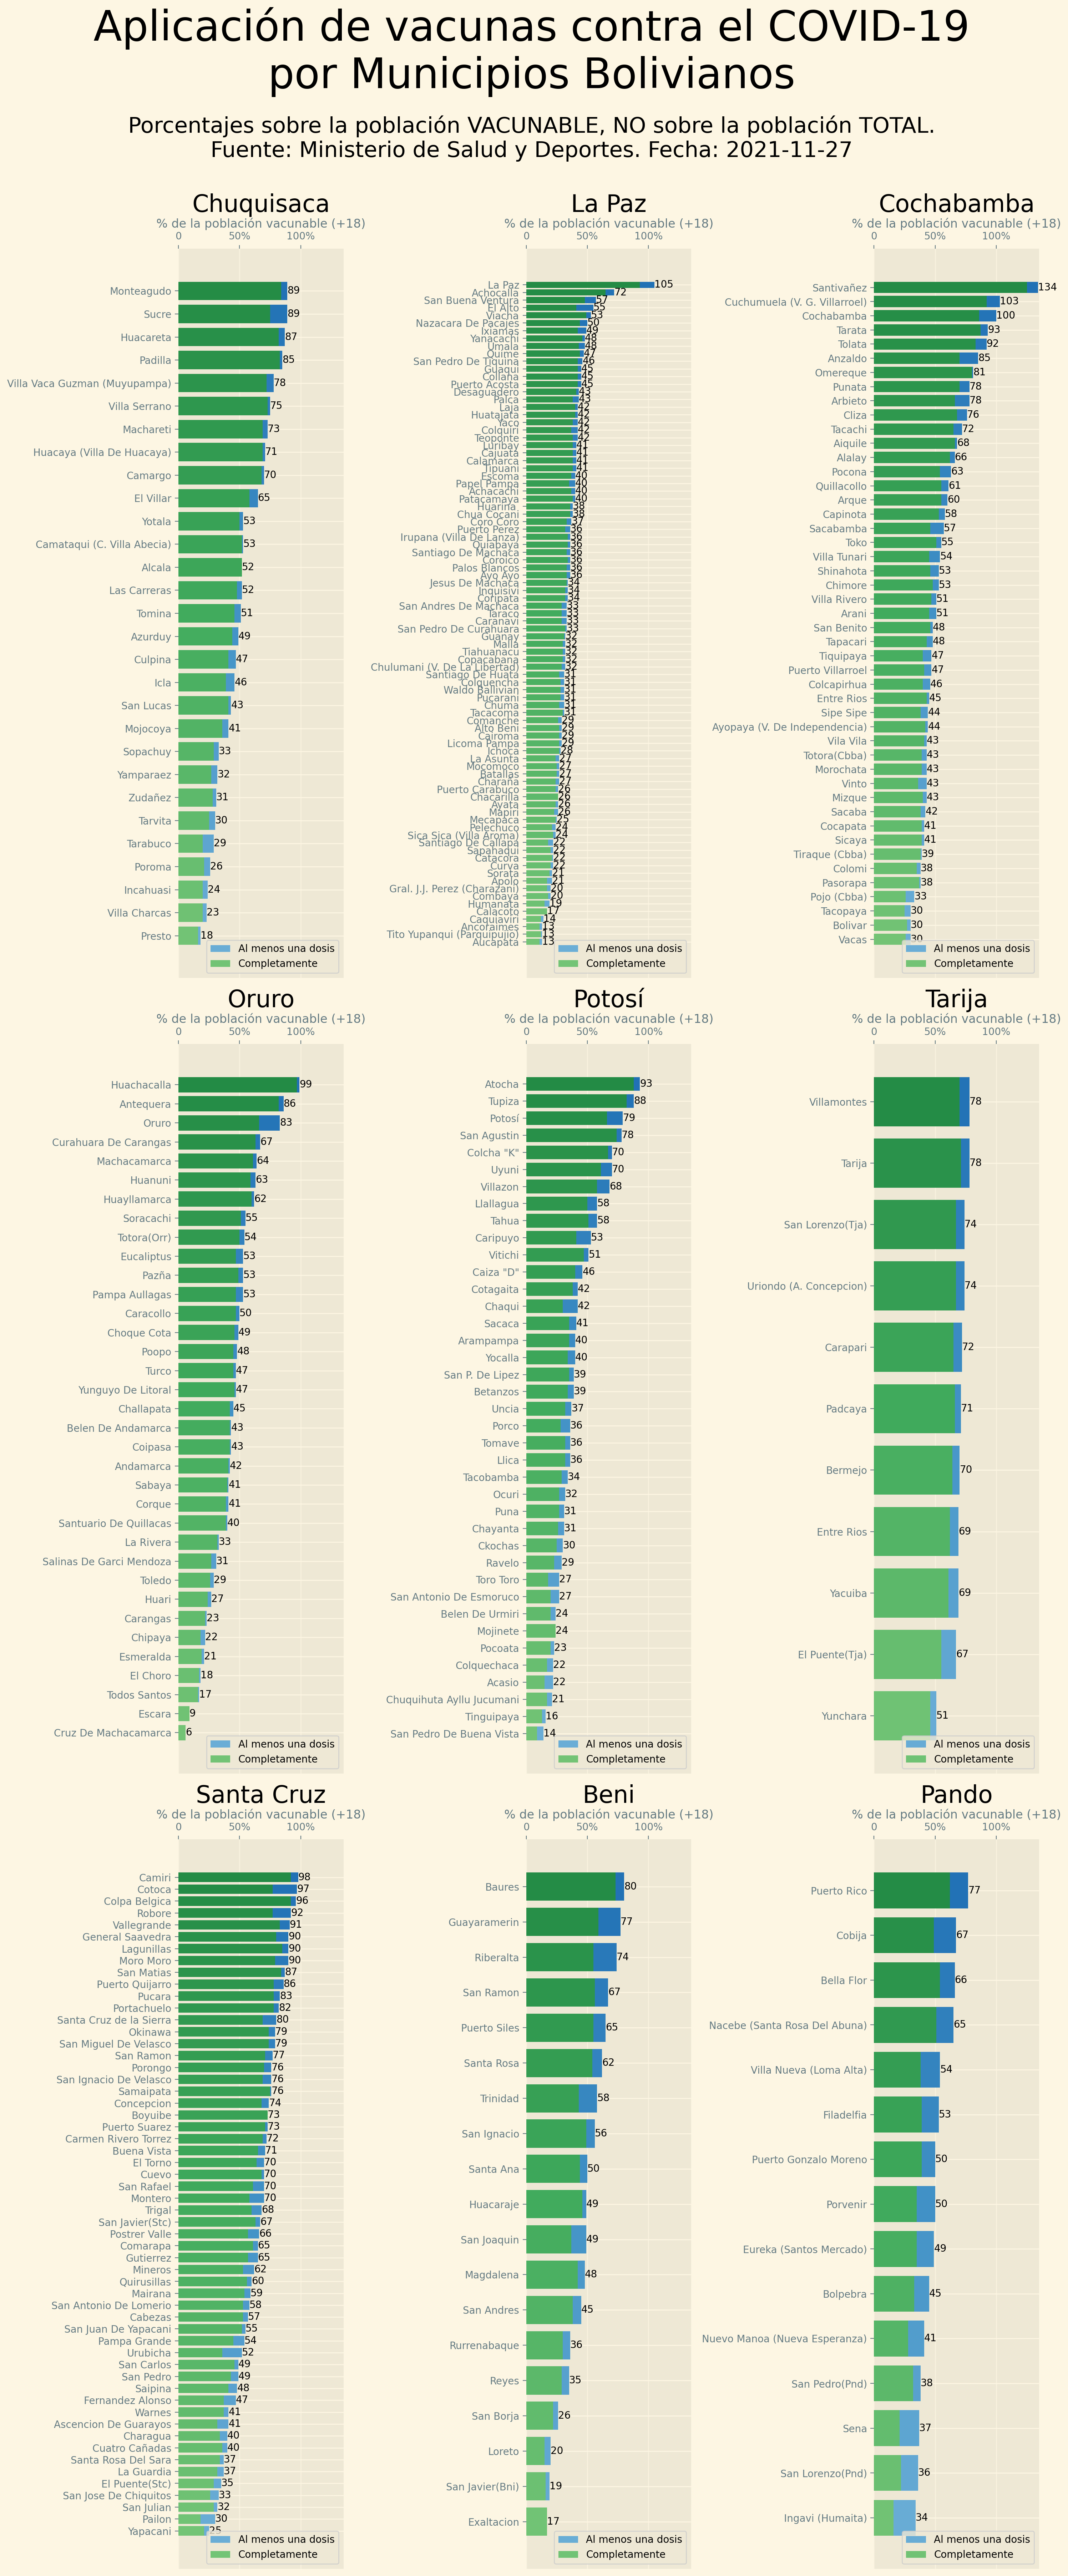

In [21]:
dff = df_wide[df_wide.fecha==str(latest_date)]

### ---

fig, axs = plt.subplots(3,3,figsize = (15,35), dpi=200)
axs = axs.flatten()

fig.suptitle("Aplicación de vacunas contra el COVID-19\npor Municipios Bolivianos", fontsize=42, y=1.03, fontname="Impact")
fig.text(.5,.97,s="Porcentajes sobre la población VACUNABLE, NO sobre la población TOTAL.\nFuente: Ministerio de Salud y Deportes. Fecha: {}".format(str(latest_date)), ha="center", fontsize=22, fontname="Impact")

list_dptm = dff.departamento.unique()
list_dptm = [x for x in list_dptm if type(x) == str]

for i in range(9):
    dfx = dff
    dfx = dff[dff.departamento==list_dptm[i]]
    dfx = dfx.set_index("municipio").sort_values(1, ascending=True)
    # display(dfx)
    
    axs[i].set_title(list_dptm[i], fontsize=24)
    
    primerasbar = axs[i].barh(dfx.index, dfx[1], zorder=3,
                              label="Al menos una dosis",color= plt.get_cmap("Blues",  len(dfx)*4) (range(len(dfx)*2, len(dfx)*4) )) 
    segundasbar = axs[i].barh(dfx.index, dfx[2], zorder=3,
                              label="Completamente", color= plt.get_cmap("Greens", len(dfx)*4) (range(len(dfx)*2, len(dfx)*4) ))
    
    axs[i].bar_label(primerasbar)
    
    # axs[i].set_ylabel("Municipio")
    axs[i].set_xlabel("% de la población vacunable (+18)")
    
    # axs2 = axs[i].twiny()
    axs[i].xaxis.set_label_position('top') 
    axs[i].xaxis.set_ticks_position('top')      
    axs[i].set_xlim(0,135)
    # axs[i].set_ylim(0, len(dfx)*1.0)
    axs[i].xaxis.set_ticks([0, 50, 100]) 
    axs[i].xaxis.set_ticklabels(["0", "50%", "100%"]) 
    axs[i].grid(alpha=.7, zorder=1, axis="x")
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    
    axs[i].legend(loc="lower right")
    
fig.tight_layout()
fig.savefig("figures/vac_mun_completo.jpg", bbox_inches="tight")

# MAPAS

In [19]:
df_map_merge = df_map.merge(df_wide, on='cod_ine')
df_map_merge.fecha = df_map_merge.fecha.apply(pd.to_datetime)

df_map_merge

,MUNICIPIO,name,cod_ine,rmapshaperid,geometry,fecha,municipio,departamento,poblacion2020,1,2
0,Esmeralda,Esmeralda,40505.0,0,"POLYGON ((-68.26700 -18.81620, -68.23940 -18.8...",2021-10-23,Esmeralda,Oruro,2854,19.0,18.0
1,Esmeralda,Esmeralda,40505.0,0,"POLYGON ((-68.26700 -18.81620, -68.23940 -18.8...",2021-10-30,Esmeralda,Oruro,2854,19.0,18.0
2,Esmeralda,Esmeralda,40505.0,0,"POLYGON ((-68.26700 -18.81620, -68.23940 -18.8...",2021-11-13,Esmeralda,Oruro,2854,20.0,19.0
3,Esmeralda,Esmeralda,40505.0,0,"POLYGON ((-68.26700 -18.81620, -68.23940 -18.8...",2021-11-20,Esmeralda,Oruro,2854,21.0,19.0
4,Esmeralda,Esmeralda,40505.0,0,"POLYGON ((-68.26700 -18.81620, -68.23940 -18.8...",2021-11-27,Esmeralda,Oruro,2854,21.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...
1687,Padcaya,Padcaya,60201.0,343,"POLYGON ((-64.36040 -21.82250, -64.35710 -21.8...",2021-10-23,Padcaya,Tarija,18582,67.0,61.0
1688,Padcaya,Padcaya,60201.0,343,"POLYGON ((-64.36040 -21.82250, -64.35710 -21.8...",2021-10-30,Padcaya,Tarija,18582,67.0,62.0
1689,Padcaya,Padcaya,60201.0,343,"POLYGON ((-64.36040 -21.82250, -64.35710 -21.8...",2021-11-13,Padcaya,Tarija,18582,69.0,64.0
1690,Padcaya,Padcaya,60201.0,343,"POLYGON ((-64.36040 -21.82250, -64.35710 -21.8...",2021-11-20,Padcaya,Tarija,18582,71.0,64.0


<AxesSubplot:title={'center':'Primera!'}>

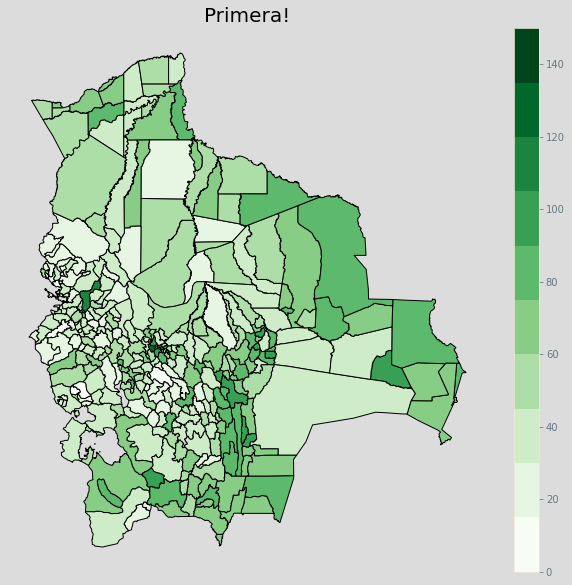

In [20]:
df_map_merge
cmap = plt.get_cmap("Greens", 10)

fig, axs = plt.subplots(1,1, figsize = (10,10))
fig.set_facecolor("gainsboro")

divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="5%", pad=0.22)

# dfx=pd.DataFrame([[0,0]])
# df_map.plot(ax=axs, facecolor="white", edgecolor="black") #background map

#     df_frame = df_activos_ff[df_activos_ff["fecha"]==df_activos_ff["fecha"].array[i]]
df_frame = df_map_merge.reset_index().groupby("fecha").get_group(str(latest_date))
#     display(df_frame)

axs.set_facecolor("gainsboro")
axs.set_title("Primera!", fontsize = 20)
axs.spines['top'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.axis("off")

df_frame.plot(column=1, 
                 ax=axs, 
                 legend=True, 
                 cax=cax, 
                 cmap=cmap,
#                      scheme='quantiles',
                 facecolor="black", 
                 edgecolor="black",
                 norm=plt.Normalize(0, 150))